In [1]:
pip install pandas scikit-learn joblib streamlit matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Accuracy: 56.67%
Logistic Regression Accuracy: 53.33%
SVM Accuracy: 50.00%


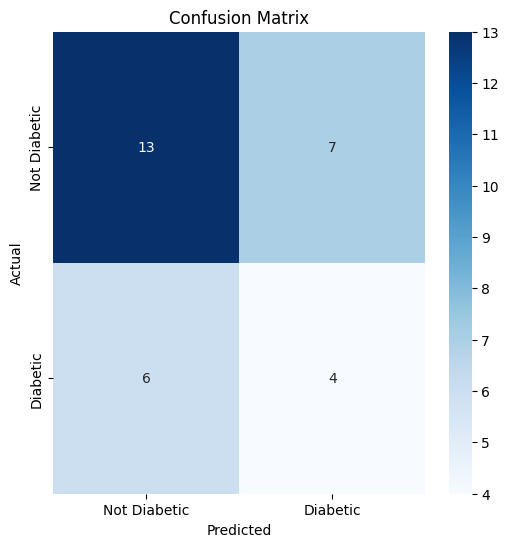

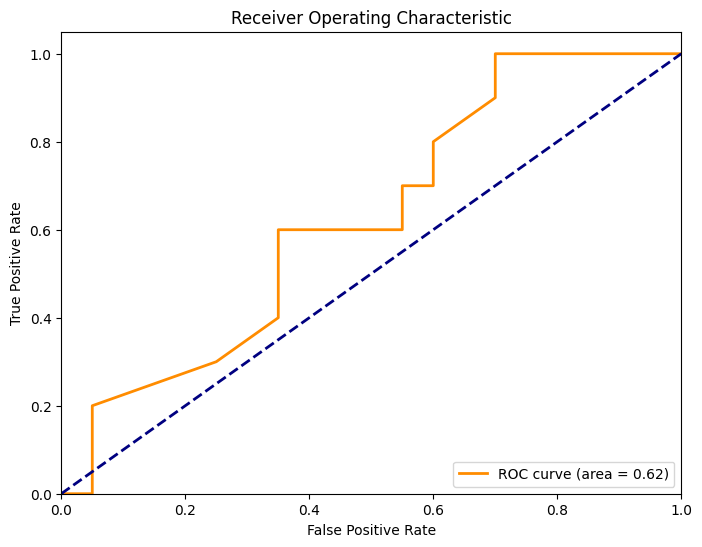

Enter value for Pregnancies: 2
Enter value for Glucose: : 85 
Invalid input! Please enter a valid number.
Enter value for Glucose:  85 
Enter value for BloodPressure:  150
Enter value for SkinThickness: 20
Enter value for Insulin:  35
Enter value for BMI: 20
Enter value for DiabetesPedigreeFunction: 0.672
Enter value for Age: 60

Prediction Result: Diabetic
Prediction Probability: 52.00%


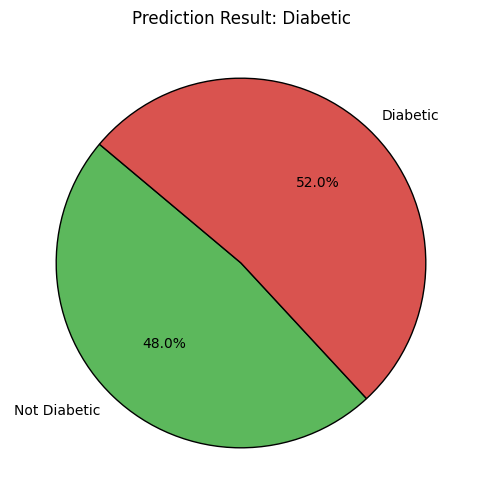

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import joblib

# Load your dataset (assuming CSV format)
# df = pd.read_csv('diabetes.csv')  # Replace with your actual dataset path
# X = df.drop('Outcome', axis=1)
# y = df['Outcome']

# Sample data (replace with actual dataset)
X = np.random.rand(100, 8)  # 100 samples, 8 features (diabetes dataset example)
y = np.random.randint(0, 2, 100)  # Random binary labels for classification

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler for later use
joblib.dump(scaler, 'scaler.pkl')

# Hyperparameter tuning for Random Forest using GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model and perform grid search
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
print(f"Best parameters found: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_

# Train and evaluate the best model
best_rf_model.fit(X_train_scaled, y_train)
y_pred = best_rf_model.predict(X_test_scaled)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Experimenting with Logistic Regression and SVM
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled, y_train)
log_reg_pred = log_reg_model.predict(X_test_scaled)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, log_reg_pred) * 100:.2f}%")

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
print(f"SVM Accuracy: {accuracy_score(y_test, svm_pred) * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Diabetic', 'Diabetic'], yticklabels=['Not Diabetic', 'Diabetic'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_rf_model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Save the final trained model for deployment
joblib.dump(best_rf_model, 'diabetes_model.pkl')

# User Input and Prediction
def predict_diabetes():
    feature_ranges = {
       'Pregnancies': (0, 20),
       'Glucose': (0, 250),
       'BloodPressure': (0, 200),
       'SkinThickness': (0, 100),
       'Insulin': (0, 900),
       'BMI': (10, 50),
       'DiabetesPedigreeFunction': (0, 2.5),
       'Age': (18, 100)
   }
    user_input = [] # Corrected indentation
    for feature in feature_ranges.keys(): # Corrected indentation
        while True: # Corrected indentation
            try: # Corrected indentation
                val = float(input(f"Enter value for {feature}: ")) # Corrected indentation
                min_val, max_val = feature_ranges[feature] # Corrected indentation
                if val < min_val or val > max_val: # Corrected indentation
                    print(f"Invalid input! {feature} should be between {min_val} and {max_val}.") # Corrected indentation
                    continue # Corrected indentation
                user_input.append(val) # Corrected indentation
                break # Corrected indentation
            except ValueError: # Corrected indentation
                print("Invalid input! Please enter a valid number.") # Corrected indentation
    # Predict using the model
    user_input_scaled = scaler.transform([user_input]) # Corrected indentation
    prediction = best_rf_model.predict(user_input_scaled) # Corrected indentation
    prediction_proba = best_rf_model.predict_proba(user_input_scaled) # Corrected indentation
    result_text = "Diabetic" if prediction == 1 else "Not Diabetic" # Corrected indentation
    print(f"\nPrediction Result: {result_text}") # Corrected indentation

    # Show prediction probability
    print(f"Prediction Probability: {prediction_proba[0][prediction[0]] * 100:.2f}%") # Corrected indentation
    # Pie Chart for Prediction Confidence
    plt.figure(figsize=(6, 6)) # Corrected indentation
    labels = ['Not Diabetic', 'Diabetic'] # Corrected indentation
    colors = ['#5cb85c', '#d9534f'] # Corrected indentation
    plt.pie(prediction_proba[0], labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'}) # Corrected indentation
    plt.title(f"Prediction Result: {result_text}") # Corrected indentation
    plt.show() # Corrected indentation

# Run the prediction function
predict_diabetes()